
# 面孔生成
在这个项目中，您将使用生成的对抗网络来生成新的面孔图像。
### 获取数据
您将在此项目中使用两个数据集：
- MNIST
- CelebA

由于celebA数据集很复杂，而且您首次在项目中执行GAN，我们希望您在CelebA之前测试MNIST上的神经网络。 在MNIST上运行GAN可以让您了解您的模型如何更快地训练。

如果您使用[FloydHub]（https://www.floydhub.com/ ），将“data_dir”设置为“/ input”，并使用[FloydHub数据ID]（http://docs.floydhub.com/home/using_datasets/ ）“R5KrjnANiKVhLWAkpXhNBe”。

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper
#下载样本数据
helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


 
## 探索数据
### MNIST
如您所知，[MNIST]（http://yann.lecun.com/exdb/mnist/ ）数据集包含手写数字的图像。 您可以通过更改“show_n_images”来查看第一个示例数。

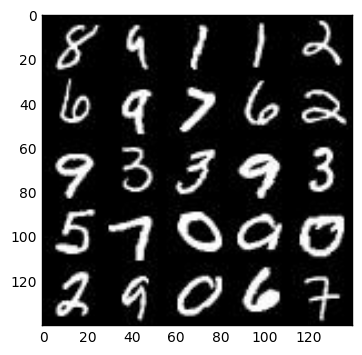

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces属性数据集（CelebA）]（http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html ）数据集包含超过20万名有注释的名人图片。 由于您要生成面孔，因此您不需要注释。 您可以通过更改“show_n_images”来查看第一个示例数。

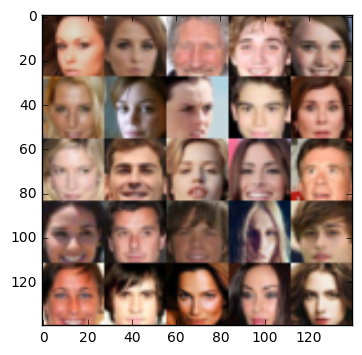

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))


## 预处理数据
由于该项目的主要重点是构建GAN，因此我们将为您处理数据。 MNIST和CelebA数据集的值将在28×28维度图像的-0.5至0.5的范围内。 CelebA图像将被裁剪以去除不包括脸部的图像部分，然后调整到28x28。

MNIST图像是具有单个[颜色通道]（https://en.wikipedia.org/wiki/Channel_(digital_image%29) ）的黑白图像，而CelebA图像具有[3色通道（RGB颜色通道）]（https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。
建立神经网络
您将通过实现以下功能构建构建GAN所需的组件：
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查TensorFlow版本和访问GPU
这将检查以确保您具有正确版本的TensorFlow和访问GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1


/home/kangfei/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


 
### 输入
实现`model_inputs`函数来创建神经网络的TF占位符。 应该创建以下占位符：
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

在以下元组中返回占位符（实际输入图像的张量，z数据的张量）

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
   创建模型输入
     ：param image_width：输入图像宽度
     ：param image_height：输入图像高度
     ：param image_channels：图像通道数
     ：param z_dim：Z的维数
     ：返回：元组（实数输入图像张量，z数据张量，学习率）
    """

    real_input = tf.placeholder(tf.float32,shape=(None,image_width,image_height,image_channels))
    z = tf.placeholder(tf.float32,shape=(None,z_dim))
    learning_rate = tf.placeholder(tf.float32)
    return real_input, z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/home/kangfei/anaconda3/lib/python3.5/runpy.py", line 184, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/home/kangfei/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/home/kangfei/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>\n    app.launch_new_instance()', 'File "/home/kangfei/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance\n    app.start()', 'File "/home/kangfei/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start\n    ioloop.IOLoop.instance().start()', 'File "/home/kangfei/anaconda3/lib/python3.5/site-packages/zmq/even

### 鉴别器
实现“鉴别器”来创建一个区分“图像”的鉴别器神经网络。 该函数应该能够重用神经网络中的变量。 使用范围名称为“discriminator”的[`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope)来允许重用这些变量。 该函数应该返回一个元组（鉴别器的张量输出，鉴别器的张量逻辑）。

In [6]:
def discriminator(images, reuse=False):
    """
   创建鉴别器网络
     ：参数图像：输入图像的张量
     ：param reuse：如果权重应重复使用，则为Boolean
     ：return：元组（鉴别器的张量输出，鉴别器的张量逻辑）
    """
    alpha = 0.1
    keep_prob = 0.5
    with tf.variable_scope('discriminator',reuse=reuse):
        '''
        tf.nn.conv2d是TensorFlow里面实现卷积的函数，参考文档对它的介绍并不是很详细，实际上这是搭建卷积神经网络比较核心的一个方法，
        非常重要

        tf.nn.conv2d(input, filter, strides, padding, use_cudnn_on_gpu=None, name=None)

        除去name参数用以指定该操作的name，与方法有关的一共五个参数：

        第一个参数input：指需要做卷积的输入图像，它要求是一个Tensor，具有[batch, in_height, in_width, in_channels]这样的shape，
        具体含义是[训练时一个batch的图片数量, 图片高度, 图片宽度, 图像通道数]，注意这是一个4维的Tensor，
        要求类型为float32和float64其中之一

        第二个参数filter：相当于CNN中的卷积核，它要求是一个Tensor，具有[filter_height, filter_width, in_channels, out_channels]
        这样的shape，具体含义是[卷积核的高度，卷积核的宽度，图像通道数，卷积核个数]，要求类型与参数input相同，
        有一个地方需要注意，第三维in_channels，就是参数input的第四维

        第三个参数strides：卷积时在图像每一维的步长，这是一个一维的向量，长度4

        第四个参数padding：string类型的量，只能是"SAME","VALID"其中之一，这个值决定了不同的卷积方式（后面会介绍）

        第五个参数：use_cudnn_on_gpu:bool类型，是否使用cudnn加速，默认为true
        
        
        tf.layer.conv2d和tf.nn.conv2d功能一样，只不过参数不一样。
        '''
        
        #第一层卷积， 
        conv1 = tf.layers.conv2d(images,64,5,strides=2,padding='same',kernel_initializer= tf.contrib.layers.xavier_initializer())
        '''
        tf.maximum：用法tf.maximum(a,b),返回的是a,b之间的最大值，
        tf.miniimum：用法tf.miiinimum(a,b),返回的是a,b之间的最小值，
        tf.argmax：用法tf.argmax(a,dimension),返回的是a中的某个维度最大值的索引，
        tf.argmain：用法tf.argmin(a,dimension),返回的是a中的某个维度最小值的索引，
        '''
        conv1 = tf.maximum(conv1*alpha,conv1)
        
        conv2 = tf.layers.conv2d(conv1,128,5,strides=2,padding='same', kernel_initializer= tf.contrib.layers.xavier_initializer())
        '''
        tensorflow中关于BN（Batch Normalization）的函数分别是：
        tf.nn.moments
        tf.nn.batch_normalization
        tf.layers.batch_normalization
        区别如下：http://www.jianshu.com/p/0312e04e4e83
        '''
        conv2 = tf.layers.batch_normalization(conv2,training=True)
        conv2 = tf.maximum(conv2*alpha,conv2)
        conv2 = tf.nn.dropout(conv2,keep_prob=keep_prob)
        
        conv3 = tf.layers.conv2d(conv2,256,5,strides=2,padding='same',kernel_initializer= tf.contrib.layers.xavier_initializer())
        conv3 = tf.layers.batch_normalization(conv3,trainable=True)
        conv3 = tf.maximum(conv3*alpha,conv3)
        conv3 = tf.nn.dropout(conv3,keep_prob=keep_prob)
        
        flat  = tf.reshape(conv3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        return out, logits
   


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器
实现`generator`来生成一个使用`z`的图像。 该函数应该能够重用神经网络中的变量。 使用范围名称为“generator”的[`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope)来允许重用这些变量。 该函数应返回生成的28 x 28 x`out_channel_dim`图像。

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    创建生成器网络
     ：参数z：输入z
     ：param out_channel_dim：输出图像中的通道数
     ：param is_train：如果生成器用于训练，则为Boolean
    :return: The tensor output of the generator
    """

    alpha_temp =0.1
    keep_prob = 0.5
    with tf.variable_scope('generator',reuse= not is_train):
        x = tf.layers.dense(z, 7*7*1024)
        x = tf.reshape(x,(-1, 7, 7, 1024))
        x = tf.layers.batch_normalization(x,training=is_train)
        x = tf.maximum(x*alpha_temp,x)
        
        conv1 = tf.layers.conv2d_transpose(x,512,5,strides=2,padding='same',kernel_initializer= tf.contrib.layers.xavier_initializer())
        conv1 = tf.layers.batch_normalization(conv1,training=is_train)
        conv1 = tf.maximum(conv1*alpha_temp,conv1)
        conv1 = tf.nn.dropout(conv1,keep_prob=keep_prob)
        
        conv2 = tf.layers.conv2d_transpose(conv1,256,5,strides=2,padding='same',kernel_initializer= tf.contrib.layers.xavier_initializer())
        conv2 = tf.layers.batch_normalization(conv2,training=is_train)
        conv2 = tf.maximum(conv2*alpha_temp,conv2)
        conv2 = tf.nn.dropout(conv2,keep_prob=keep_prob)
        
        logits = tf.layers.conv2d_transpose(conv2,out_channel_dim,5,strides=1,padding='same',kernel_initializer= tf.contrib.layers.xavier_initializer())
        out = tf.tanh(logits)
        
    return out

 
 

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
实施“model_loss”来构建GAN进行训练并计算损失。 该函数应该返回一个元组（鉴别器丢失，发生器丢失）。 使用您实现的以下功能：
- `discriminator（images，reuse = False）`
- `generator（z，out_channel_dim，is_train = True）`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    得到鉴别器和发生器的损失
     ：param input_real：来自真实数据集的图像
     ：param input_z：Z输入
     ：param out_channel_dim：输出图像中的通道数
    :return: A tuple of (discriminator loss, generator loss)
    """
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(images = input_real)
    d_model_fake, d_logits_fake = discriminator(images = g_model, reuse = True)
    
    '''
    tf.reduce_mean(input_tensor, reduction_indices=None, keep_dims=False, name=None)
    计算张量的尺寸的元素平均值。
    
    交叉熵（Cross Entropy）是Loss函数的一种（也称为损失函数或代价函数），用于描述模型预测值与真实值的差距大小，
    常见的Loss函数就是均方平方差（Mean Squared Error）
    TensorFlow针对分类问题，实现了四个交叉熵函数，分别是
    tf.nn.sigmoid_cross_entropy_with_logits、
    tf.nn.softmax_cross_entropy_with_logits、
    tf.nn.sparse_softmax_cross_entropy_with_logits
    tf.nn.weighted_cross_entropy_with_logits
    
    sigmoid_cross_entropy_with_logits这个函数的输入是logits和targets，logits就是神经网络模型中的 W * X矩阵，注意不需要经过sigmoid，
    而targets的shape和logits相同，
    就是正确的label值，例如这个模型一次要判断100张图是否包含10种动物，这两个输入的shape都是[100, 10]。注释中还提到这10个分类之间是独立的、
    不要求是互斥，这种问题我们成为多目标，例如判断图片中是否包含10种动物，label值可以包含多个1或0个1，还有一种问题是多分类问题，
    例如我们对年龄特征分为5段，只允许5个值有且只有1个值为1，这种问题可以直接用这个函数吗？答案是不可以
    '''
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real,
                                                                        labels = tf.ones_like(d_model_real)*(1-smooth)))
    
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake,
                                                                        labels = tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake,
                                                                   labels = tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return (d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化
实现`model_opt`来创建GAN的优化操作。 使用[`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables)获取所有可培训的变量。 用名称和标识符和生成器范围名称过滤变量。 该功能应该返回一个元组（鉴别器训练操作，发电机训练操作）。

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    获取优化操作
     ：param d_loss：Discriminator loss Tensor
     ：param g_loss：发生器损失张量
     ：param learning_rate：学习率占位符
     ：param beta1：优化器中第一时刻的指数衰减率
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    '''
    TensorFlow提供的tf.train.AdamOptimizer来控制学习速度。AdamOptimizer通过使用动量（参数的移动平均数）来改善传统梯度下降，
    促进超参数动态调整。
    '''
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 =beta1).minimize(g_loss, var_list = g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


 

## 神经网络训练
### 显示输出
使用此功能可在训练期间显示generator的当前输出。 这将帮助您确定GAN培训的良好程度。

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
实施“train”来建设和训练GAN。 使用您实现的以下功能：
- `model_inputs（image_width，image_height，image_channels，z_dim）`
- `model_loss（input_real，input_z，out_channel_dim）`
- `model_opt（d_loss，g_loss，learning_rate，beta1）`

在训练时使用`show_generator_output`显示`generator`输出。 为每个批次运行“show_generator_output”将大大增加培训时间并增加笔记本的大小。 建议每100批打印一次“发生器”输出。

In [25]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    训练GAN
     ：param epoch_count：历元数
     ：param batch_size：批量大小
     ：param z_dim：Z维
     ：param learning_rate：学习率
     ：param beta1：优化器中第一时刻的指数衰减率
     ：param get_batches：获取批次的功能
     ：param data_shape：数据的形状
     ：param data_image_mode：图像使用的图像模式（“RGB”或“L”）
    """
    
    steps = 0
   
    if (data_image_mode == "L"):
        out_channel_dim = 1
    else:
        out_channel_dim = 3
        
    print_every = 10
    show_every = 100
    samples, losses = [],[]
    inputs_real, inputs_z, lr = model_inputs(data_shape[1], 
                                                       data_shape[2], 
                                                       data_shape[3], 
                                                       z_dim)
    lr = learning_rate
    d_loss, g_loss = model_loss(inputs_real, 
                                inputs_z, 
                                out_channel_dim)
        
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images = batch_images *2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={inputs_real: batch_images,
                                               inputs_z: batch_z})       
                _ = sess.run(g_opt, feed_dict={inputs_z: batch_z, 
                                               inputs_real: batch_images})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({inputs_z: batch_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z: batch_z})

                    print("Epoch {}/{}...".format((epoch_i+1), epoch_count),
                          "Discriminator Loss: {:.4f}".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                    #losses.append((train_loss_d,train_loss_g))
                    
                if steps % show_every == 0:
                    
                    show_generator_output(sess, 9, inputs_z, data_shape[3], 
                                                        data_image_mode)

### MNIST
在MNIST上测试您的GAN架构。 经过2个纪元，GAN应该能够生成看起来像手写数字的图像。 确保发电机的损耗低于鉴别器的损耗或接近0。

Epoch 1/2... Discriminator Loss: 0.8101 Generator Loss: 1.8681
Epoch 1/2... Discriminator Loss: 1.8810 Generator Loss: 0.6227
Epoch 1/2... Discriminator Loss: 0.7110 Generator Loss: 1.8510
Epoch 1/2... Discriminator Loss: 1.2553 Generator Loss: 0.8306
Epoch 1/2... Discriminator Loss: 0.7446 Generator Loss: 1.7955
Epoch 1/2... Discriminator Loss: 0.7869 Generator Loss: 1.7894
Epoch 1/2... Discriminator Loss: 0.8004 Generator Loss: 2.2180
Epoch 1/2... Discriminator Loss: 1.0417 Generator Loss: 1.8016
Epoch 1/2... Discriminator Loss: 1.2241 Generator Loss: 1.9296
Epoch 1/2... Discriminator Loss: 1.1842 Generator Loss: 0.8817


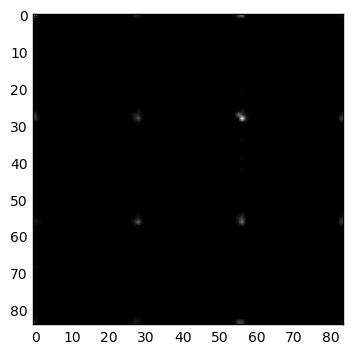

Epoch 1/2... Discriminator Loss: 1.0136 Generator Loss: 1.4220
Epoch 1/2... Discriminator Loss: 1.1118 Generator Loss: 1.3376
Epoch 1/2... Discriminator Loss: 0.9367 Generator Loss: 1.3682
Epoch 1/2... Discriminator Loss: 1.0087 Generator Loss: 1.6505
Epoch 1/2... Discriminator Loss: 0.9929 Generator Loss: 1.4600
Epoch 1/2... Discriminator Loss: 0.9253 Generator Loss: 1.3300
Epoch 1/2... Discriminator Loss: 1.0350 Generator Loss: 1.8409
Epoch 1/2... Discriminator Loss: 1.1451 Generator Loss: 0.9729
Epoch 1/2... Discriminator Loss: 1.1623 Generator Loss: 0.9414
Epoch 1/2... Discriminator Loss: 1.2252 Generator Loss: 1.4217


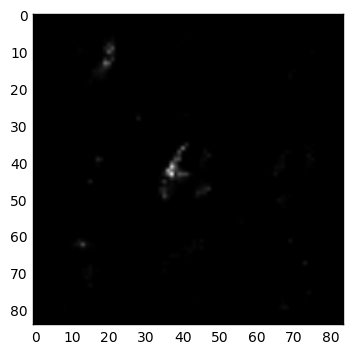

Epoch 1/2... Discriminator Loss: 1.1880 Generator Loss: 1.1231
Epoch 1/2... Discriminator Loss: 1.1879 Generator Loss: 1.4419
Epoch 1/2... Discriminator Loss: 1.2057 Generator Loss: 1.5538
Epoch 1/2... Discriminator Loss: 1.2193 Generator Loss: 1.2885
Epoch 1/2... Discriminator Loss: 1.1027 Generator Loss: 1.0230
Epoch 1/2... Discriminator Loss: 1.1812 Generator Loss: 0.8830
Epoch 1/2... Discriminator Loss: 1.2731 Generator Loss: 0.7209
Epoch 1/2... Discriminator Loss: 1.2388 Generator Loss: 0.9159
Epoch 1/2... Discriminator Loss: 1.1937 Generator Loss: 1.6452
Epoch 1/2... Discriminator Loss: 1.3801 Generator Loss: 0.6611


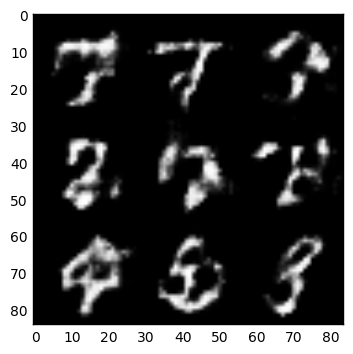

Epoch 1/2... Discriminator Loss: 1.0697 Generator Loss: 1.4371
Epoch 1/2... Discriminator Loss: 1.2340 Generator Loss: 0.8462
Epoch 1/2... Discriminator Loss: 1.2841 Generator Loss: 0.8714
Epoch 1/2... Discriminator Loss: 1.2057 Generator Loss: 1.2927
Epoch 1/2... Discriminator Loss: 1.1988 Generator Loss: 1.0055
Epoch 1/2... Discriminator Loss: 1.1977 Generator Loss: 1.0265
Epoch 1/2... Discriminator Loss: 1.1560 Generator Loss: 1.0022
Epoch 1/2... Discriminator Loss: 1.2487 Generator Loss: 1.1605
Epoch 1/2... Discriminator Loss: 1.1790 Generator Loss: 1.0971
Epoch 1/2... Discriminator Loss: 1.2977 Generator Loss: 1.0806


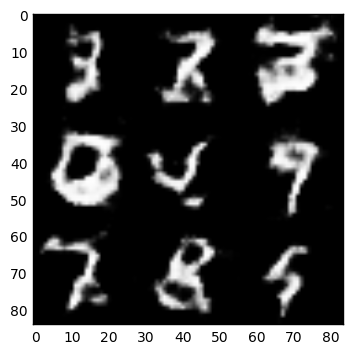

Epoch 1/2... Discriminator Loss: 1.2408 Generator Loss: 0.9083
Epoch 1/2... Discriminator Loss: 1.2142 Generator Loss: 0.9553
Epoch 1/2... Discriminator Loss: 1.2573 Generator Loss: 0.9959
Epoch 1/2... Discriminator Loss: 1.2210 Generator Loss: 1.0476
Epoch 1/2... Discriminator Loss: 1.2605 Generator Loss: 0.9566
Epoch 1/2... Discriminator Loss: 1.2120 Generator Loss: 1.0480
Epoch 1/2... Discriminator Loss: 1.2312 Generator Loss: 0.9734
Epoch 1/2... Discriminator Loss: 1.2964 Generator Loss: 0.8749
Epoch 1/2... Discriminator Loss: 1.2302 Generator Loss: 1.0047
Epoch 1/2... Discriminator Loss: 1.3258 Generator Loss: 0.9854


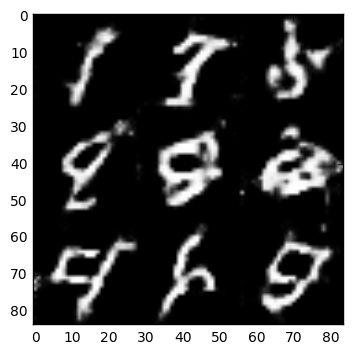

Epoch 1/2... Discriminator Loss: 1.3018 Generator Loss: 1.0254
Epoch 1/2... Discriminator Loss: 1.2461 Generator Loss: 1.0862
Epoch 1/2... Discriminator Loss: 1.2911 Generator Loss: 0.7559
Epoch 1/2... Discriminator Loss: 1.1810 Generator Loss: 1.0431
Epoch 1/2... Discriminator Loss: 1.2438 Generator Loss: 1.0205
Epoch 1/2... Discriminator Loss: 1.2669 Generator Loss: 1.1183
Epoch 1/2... Discriminator Loss: 1.2512 Generator Loss: 0.7137
Epoch 1/2... Discriminator Loss: 1.2204 Generator Loss: 1.2418
Epoch 1/2... Discriminator Loss: 1.2124 Generator Loss: 0.9363
Epoch 1/2... Discriminator Loss: 1.1756 Generator Loss: 0.9169


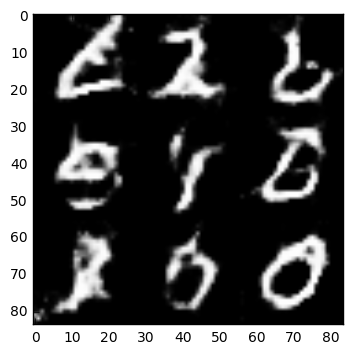

Epoch 1/2... Discriminator Loss: 1.2861 Generator Loss: 0.7879
Epoch 1/2... Discriminator Loss: 1.3256 Generator Loss: 0.9364
Epoch 1/2... Discriminator Loss: 1.1787 Generator Loss: 0.9706
Epoch 1/2... Discriminator Loss: 1.2162 Generator Loss: 1.1194
Epoch 1/2... Discriminator Loss: 1.2268 Generator Loss: 0.8042
Epoch 1/2... Discriminator Loss: 1.1461 Generator Loss: 1.1242
Epoch 1/2... Discriminator Loss: 1.2711 Generator Loss: 1.2789
Epoch 1/2... Discriminator Loss: 1.1453 Generator Loss: 1.3234
Epoch 1/2... Discriminator Loss: 1.1618 Generator Loss: 1.0288
Epoch 1/2... Discriminator Loss: 1.2031 Generator Loss: 1.1311


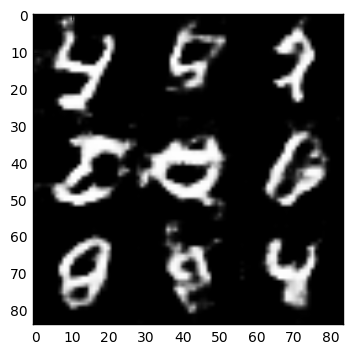

Epoch 1/2... Discriminator Loss: 1.1496 Generator Loss: 1.1318
Epoch 1/2... Discriminator Loss: 1.2872 Generator Loss: 0.9912
Epoch 1/2... Discriminator Loss: 1.2939 Generator Loss: 1.2185
Epoch 1/2... Discriminator Loss: 1.1685 Generator Loss: 0.9511
Epoch 1/2... Discriminator Loss: 1.2177 Generator Loss: 1.0968
Epoch 1/2... Discriminator Loss: 1.1785 Generator Loss: 0.9519
Epoch 1/2... Discriminator Loss: 1.2102 Generator Loss: 0.9488
Epoch 1/2... Discriminator Loss: 1.1825 Generator Loss: 1.3112
Epoch 1/2... Discriminator Loss: 1.1752 Generator Loss: 1.0398
Epoch 1/2... Discriminator Loss: 1.3144 Generator Loss: 1.1607


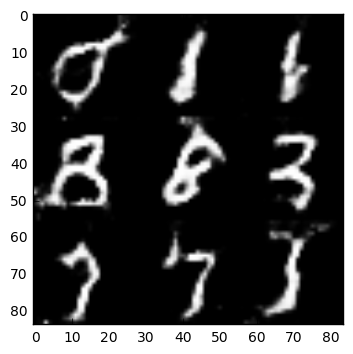

Epoch 1/2... Discriminator Loss: 1.2348 Generator Loss: 0.7789
Epoch 1/2... Discriminator Loss: 1.1996 Generator Loss: 0.8450
Epoch 1/2... Discriminator Loss: 1.1130 Generator Loss: 1.2166
Epoch 1/2... Discriminator Loss: 1.1656 Generator Loss: 0.8837
Epoch 1/2... Discriminator Loss: 1.2170 Generator Loss: 1.1113
Epoch 1/2... Discriminator Loss: 1.2423 Generator Loss: 0.9087
Epoch 1/2... Discriminator Loss: 1.1484 Generator Loss: 1.2999
Epoch 1/2... Discriminator Loss: 1.2448 Generator Loss: 0.9232
Epoch 1/2... Discriminator Loss: 1.1740 Generator Loss: 1.3051
Epoch 1/2... Discriminator Loss: 1.2481 Generator Loss: 1.1524


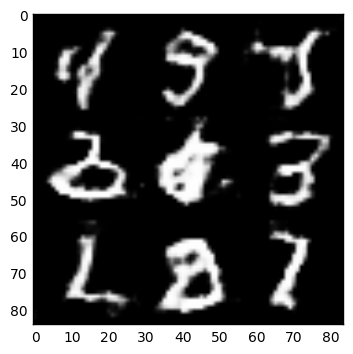

Epoch 1/2... Discriminator Loss: 1.2006 Generator Loss: 1.0189
Epoch 1/2... Discriminator Loss: 1.1676 Generator Loss: 1.1168
Epoch 1/2... Discriminator Loss: 1.2721 Generator Loss: 1.2638
Epoch 2/2... Discriminator Loss: 1.1827 Generator Loss: 1.1116
Epoch 2/2... Discriminator Loss: 1.2514 Generator Loss: 1.0602
Epoch 2/2... Discriminator Loss: 1.3340 Generator Loss: 1.2368
Epoch 2/2... Discriminator Loss: 1.1498 Generator Loss: 1.0304
Epoch 2/2... Discriminator Loss: 1.2169 Generator Loss: 1.2157
Epoch 2/2... Discriminator Loss: 1.1756 Generator Loss: 0.8902
Epoch 2/2... Discriminator Loss: 1.1608 Generator Loss: 1.0753


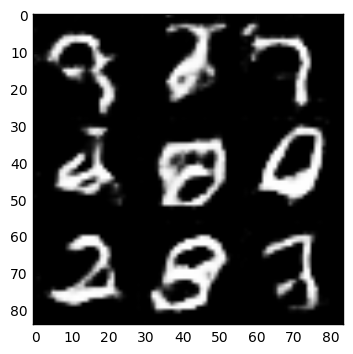

Epoch 2/2... Discriminator Loss: 1.1271 Generator Loss: 0.8725
Epoch 2/2... Discriminator Loss: 1.1883 Generator Loss: 1.2621
Epoch 2/2... Discriminator Loss: 1.1256 Generator Loss: 1.2558
Epoch 2/2... Discriminator Loss: 1.2521 Generator Loss: 0.9344
Epoch 2/2... Discriminator Loss: 1.2277 Generator Loss: 1.0479
Epoch 2/2... Discriminator Loss: 1.1815 Generator Loss: 1.2167
Epoch 2/2... Discriminator Loss: 1.1967 Generator Loss: 0.7581
Epoch 2/2... Discriminator Loss: 1.0613 Generator Loss: 1.2156
Epoch 2/2... Discriminator Loss: 1.2274 Generator Loss: 1.0690
Epoch 2/2... Discriminator Loss: 1.2215 Generator Loss: 1.1254


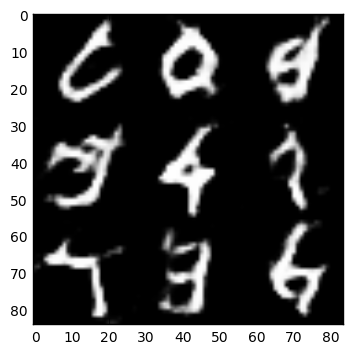

Epoch 2/2... Discriminator Loss: 1.1943 Generator Loss: 0.8593
Epoch 2/2... Discriminator Loss: 1.1554 Generator Loss: 1.2938
Epoch 2/2... Discriminator Loss: 1.1541 Generator Loss: 1.1657
Epoch 2/2... Discriminator Loss: 1.3113 Generator Loss: 1.3561
Epoch 2/2... Discriminator Loss: 1.1892 Generator Loss: 1.2778
Epoch 2/2... Discriminator Loss: 1.2088 Generator Loss: 1.4040
Epoch 2/2... Discriminator Loss: 1.2496 Generator Loss: 1.0090
Epoch 2/2... Discriminator Loss: 1.1222 Generator Loss: 1.2181
Epoch 2/2... Discriminator Loss: 1.1348 Generator Loss: 1.0404
Epoch 2/2... Discriminator Loss: 1.1372 Generator Loss: 1.2506


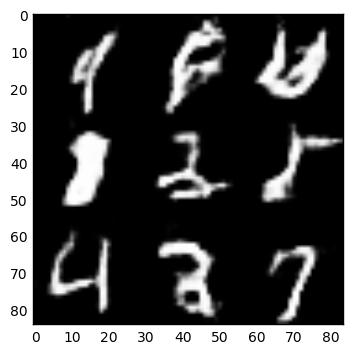

Epoch 2/2... Discriminator Loss: 1.1577 Generator Loss: 1.1395
Epoch 2/2... Discriminator Loss: 1.3233 Generator Loss: 0.8245
Epoch 2/2... Discriminator Loss: 1.2812 Generator Loss: 1.0308
Epoch 2/2... Discriminator Loss: 1.1769 Generator Loss: 1.1091
Epoch 2/2... Discriminator Loss: 1.1821 Generator Loss: 0.9888
Epoch 2/2... Discriminator Loss: 1.2147 Generator Loss: 1.1901
Epoch 2/2... Discriminator Loss: 1.1475 Generator Loss: 0.9871
Epoch 2/2... Discriminator Loss: 1.1479 Generator Loss: 1.3413
Epoch 2/2... Discriminator Loss: 1.2151 Generator Loss: 1.0407
Epoch 2/2... Discriminator Loss: 1.0983 Generator Loss: 1.3035


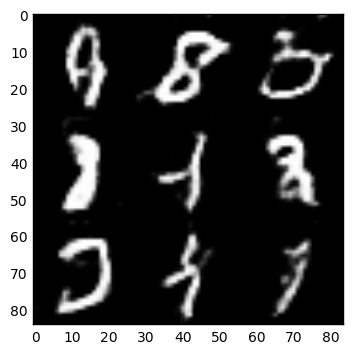

Epoch 2/2... Discriminator Loss: 1.0488 Generator Loss: 1.2658
Epoch 2/2... Discriminator Loss: 1.0907 Generator Loss: 0.9998
Epoch 2/2... Discriminator Loss: 1.2716 Generator Loss: 0.7188
Epoch 2/2... Discriminator Loss: 1.1248 Generator Loss: 0.8958
Epoch 2/2... Discriminator Loss: 1.1180 Generator Loss: 0.9392
Epoch 2/2... Discriminator Loss: 1.2355 Generator Loss: 0.8021
Epoch 2/2... Discriminator Loss: 1.1461 Generator Loss: 1.6168
Epoch 2/2... Discriminator Loss: 1.1294 Generator Loss: 0.8897
Epoch 2/2... Discriminator Loss: 1.1232 Generator Loss: 0.9996
Epoch 2/2... Discriminator Loss: 1.1332 Generator Loss: 1.3401


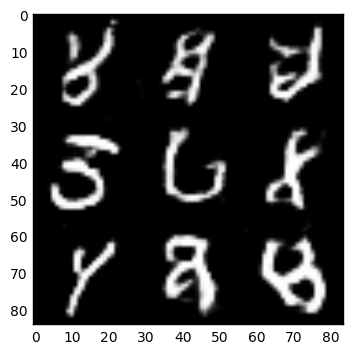

Epoch 2/2... Discriminator Loss: 1.0389 Generator Loss: 1.4147
Epoch 2/2... Discriminator Loss: 1.1084 Generator Loss: 1.1242
Epoch 2/2... Discriminator Loss: 1.3413 Generator Loss: 1.4387
Epoch 2/2... Discriminator Loss: 1.0757 Generator Loss: 1.0886
Epoch 2/2... Discriminator Loss: 1.1750 Generator Loss: 1.2689
Epoch 2/2... Discriminator Loss: 1.2628 Generator Loss: 1.6532
Epoch 2/2... Discriminator Loss: 1.1583 Generator Loss: 1.1086
Epoch 2/2... Discriminator Loss: 1.1937 Generator Loss: 1.2945
Epoch 2/2... Discriminator Loss: 1.0195 Generator Loss: 1.1004
Epoch 2/2... Discriminator Loss: 1.1566 Generator Loss: 1.2961


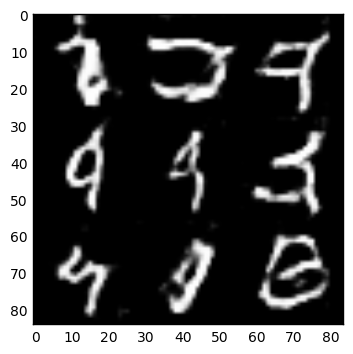

Epoch 2/2... Discriminator Loss: 1.1861 Generator Loss: 1.4451
Epoch 2/2... Discriminator Loss: 1.0232 Generator Loss: 1.3485
Epoch 2/2... Discriminator Loss: 0.9710 Generator Loss: 1.2510
Epoch 2/2... Discriminator Loss: 1.0708 Generator Loss: 1.5701
Epoch 2/2... Discriminator Loss: 1.0876 Generator Loss: 1.1473
Epoch 2/2... Discriminator Loss: 1.0511 Generator Loss: 1.0240
Epoch 2/2... Discriminator Loss: 1.0445 Generator Loss: 1.3987
Epoch 2/2... Discriminator Loss: 0.9680 Generator Loss: 1.3222
Epoch 2/2... Discriminator Loss: 1.1783 Generator Loss: 0.9901
Epoch 2/2... Discriminator Loss: 1.1160 Generator Loss: 1.1773


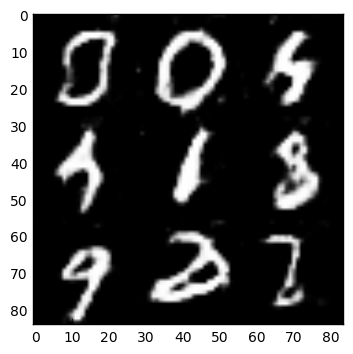

Epoch 2/2... Discriminator Loss: 1.0933 Generator Loss: 1.2520
Epoch 2/2... Discriminator Loss: 1.0039 Generator Loss: 1.0155
Epoch 2/2... Discriminator Loss: 1.0933 Generator Loss: 1.1553
Epoch 2/2... Discriminator Loss: 1.1231 Generator Loss: 1.1595
Epoch 2/2... Discriminator Loss: 1.1255 Generator Loss: 1.2605
Epoch 2/2... Discriminator Loss: 1.0679 Generator Loss: 1.3165
Epoch 2/2... Discriminator Loss: 1.0689 Generator Loss: 1.1750
Epoch 2/2... Discriminator Loss: 1.3181 Generator Loss: 0.7118
Epoch 2/2... Discriminator Loss: 1.0296 Generator Loss: 1.3246
Epoch 2/2... Discriminator Loss: 1.1984 Generator Loss: 1.3545


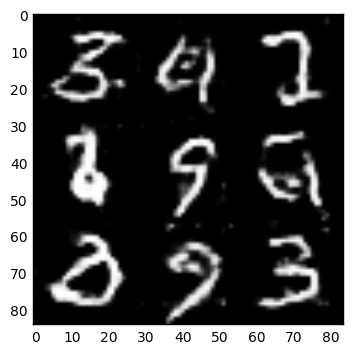

Epoch 2/2... Discriminator Loss: 1.0971 Generator Loss: 1.0138
Epoch 2/2... Discriminator Loss: 1.0371 Generator Loss: 1.1860
Epoch 2/2... Discriminator Loss: 1.1175 Generator Loss: 1.2346
Epoch 2/2... Discriminator Loss: 1.0806 Generator Loss: 1.4964
Epoch 2/2... Discriminator Loss: 1.1470 Generator Loss: 1.2160
Epoch 2/2... Discriminator Loss: 1.2144 Generator Loss: 1.5506
Epoch 2/2... Discriminator Loss: 1.0519 Generator Loss: 1.1130
Epoch 2/2... Discriminator Loss: 1.1989 Generator Loss: 1.1466
Epoch 2/2... Discriminator Loss: 1.1954 Generator Loss: 1.4844
Epoch 2/2... Discriminator Loss: 1.0726 Generator Loss: 1.5726


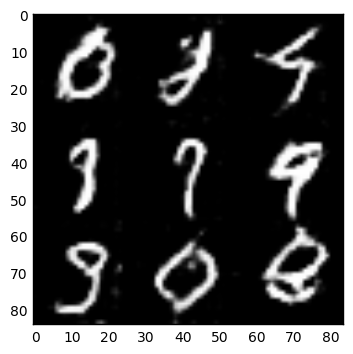

Epoch 2/2... Discriminator Loss: 1.2977 Generator Loss: 1.5854
Epoch 2/2... Discriminator Loss: 1.1387 Generator Loss: 1.1052
Epoch 2/2... Discriminator Loss: 1.1341 Generator Loss: 1.3399
Epoch 2/2... Discriminator Loss: 1.1248 Generator Loss: 0.9939
Epoch 2/2... Discriminator Loss: 1.0078 Generator Loss: 1.3133
Epoch 2/2... Discriminator Loss: 1.1525 Generator Loss: 1.2194
Epoch 2/2... Discriminator Loss: 1.0768 Generator Loss: 1.2083


In [26]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
在CelebA上运行你的GAN。 平均GPU需要大约20分钟才能运行一个时代。 您可以运行整个时代，或者当它开始生成逼真的面孔时停止。

Epoch 1/1... Discriminator Loss: 0.6932 Generator Loss: 1.7845
Epoch 1/1... Discriminator Loss: 0.4543 Generator Loss: 3.2229
Epoch 1/1... Discriminator Loss: 0.4216 Generator Loss: 3.9697
Epoch 1/1... Discriminator Loss: 0.6552 Generator Loss: 2.2392
Epoch 1/1... Discriminator Loss: 0.4827 Generator Loss: 2.7400
Epoch 1/1... Discriminator Loss: 0.5137 Generator Loss: 3.3296
Epoch 1/1... Discriminator Loss: 0.6554 Generator Loss: 2.5580
Epoch 1/1... Discriminator Loss: 0.6019 Generator Loss: 2.9460
Epoch 1/1... Discriminator Loss: 0.5269 Generator Loss: 3.3485
Epoch 1/1... Discriminator Loss: 0.4394 Generator Loss: 3.7543


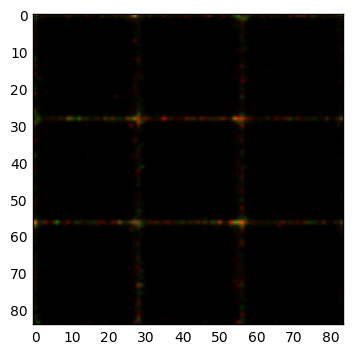

Epoch 1/1... Discriminator Loss: 0.4244 Generator Loss: 3.7942
Epoch 1/1... Discriminator Loss: 0.4565 Generator Loss: 4.6221
Epoch 1/1... Discriminator Loss: 0.5020 Generator Loss: 3.1207
Epoch 1/1... Discriminator Loss: 0.4573 Generator Loss: 4.4106
Epoch 1/1... Discriminator Loss: 3.1552 Generator Loss: 9.3254
Epoch 1/1... Discriminator Loss: 0.6226 Generator Loss: 2.0691
Epoch 1/1... Discriminator Loss: 0.5189 Generator Loss: 3.6260
Epoch 1/1... Discriminator Loss: 0.5153 Generator Loss: 2.7682
Epoch 1/1... Discriminator Loss: 0.5018 Generator Loss: 3.1648
Epoch 1/1... Discriminator Loss: 0.8225 Generator Loss: 5.7488


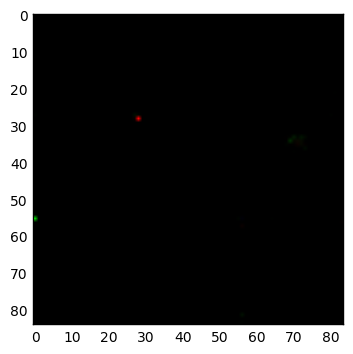

Epoch 1/1... Discriminator Loss: 0.5914 Generator Loss: 3.0185
Epoch 1/1... Discriminator Loss: 0.5259 Generator Loss: 2.5543
Epoch 1/1... Discriminator Loss: 0.9178 Generator Loss: 1.1964
Epoch 1/1... Discriminator Loss: 0.7951 Generator Loss: 1.8615
Epoch 1/1... Discriminator Loss: 0.7437 Generator Loss: 1.8269
Epoch 1/1... Discriminator Loss: 0.7173 Generator Loss: 1.8523
Epoch 1/1... Discriminator Loss: 1.9558 Generator Loss: 4.6642
Epoch 1/1... Discriminator Loss: 0.8366 Generator Loss: 1.9725
Epoch 1/1... Discriminator Loss: 1.0076 Generator Loss: 1.2530
Epoch 1/1... Discriminator Loss: 0.8185 Generator Loss: 1.8992


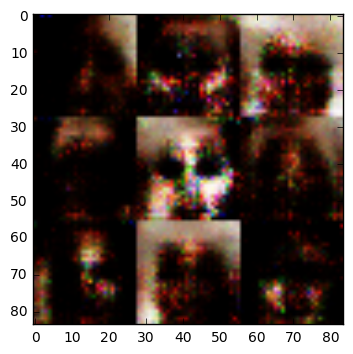

Epoch 1/1... Discriminator Loss: 0.7752 Generator Loss: 2.2354
Epoch 1/1... Discriminator Loss: 1.0998 Generator Loss: 3.0106
Epoch 1/1... Discriminator Loss: 0.8787 Generator Loss: 1.3839
Epoch 1/1... Discriminator Loss: 0.8114 Generator Loss: 1.9816
Epoch 1/1... Discriminator Loss: 1.1974 Generator Loss: 3.3610
Epoch 1/1... Discriminator Loss: 0.8404 Generator Loss: 1.4366
Epoch 1/1... Discriminator Loss: 0.9171 Generator Loss: 1.8113
Epoch 1/1... Discriminator Loss: 0.8855 Generator Loss: 1.5519
Epoch 1/1... Discriminator Loss: 1.1100 Generator Loss: 1.9901
Epoch 1/1... Discriminator Loss: 0.8475 Generator Loss: 2.2447


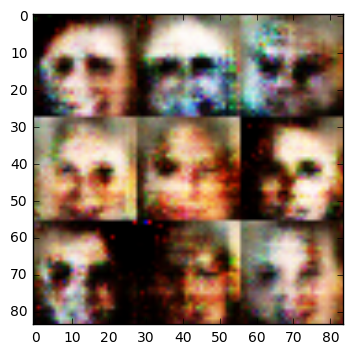

Epoch 1/1... Discriminator Loss: 1.0926 Generator Loss: 1.1754
Epoch 1/1... Discriminator Loss: 0.9751 Generator Loss: 1.6225
Epoch 1/1... Discriminator Loss: 0.9121 Generator Loss: 1.7224
Epoch 1/1... Discriminator Loss: 0.8890 Generator Loss: 1.3707
Epoch 1/1... Discriminator Loss: 1.0280 Generator Loss: 1.0353
Epoch 1/1... Discriminator Loss: 1.0127 Generator Loss: 1.4508
Epoch 1/1... Discriminator Loss: 1.1213 Generator Loss: 1.0094
Epoch 1/1... Discriminator Loss: 1.0098 Generator Loss: 1.3956
Epoch 1/1... Discriminator Loss: 1.0009 Generator Loss: 1.4990
Epoch 1/1... Discriminator Loss: 0.9822 Generator Loss: 1.6935


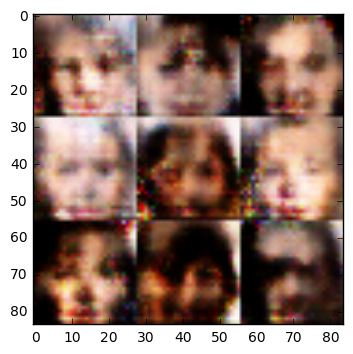

Epoch 1/1... Discriminator Loss: 0.9972 Generator Loss: 1.6353
Epoch 1/1... Discriminator Loss: 1.2261 Generator Loss: 1.6094
Epoch 1/1... Discriminator Loss: 0.8901 Generator Loss: 1.8726
Epoch 1/1... Discriminator Loss: 0.9747 Generator Loss: 1.6682
Epoch 1/1... Discriminator Loss: 1.1185 Generator Loss: 0.8991
Epoch 1/1... Discriminator Loss: 1.0373 Generator Loss: 1.2423
Epoch 1/1... Discriminator Loss: 1.1609 Generator Loss: 1.3691
Epoch 1/1... Discriminator Loss: 0.8930 Generator Loss: 1.5909
Epoch 1/1... Discriminator Loss: 1.0310 Generator Loss: 1.2016
Epoch 1/1... Discriminator Loss: 1.1067 Generator Loss: 1.0005


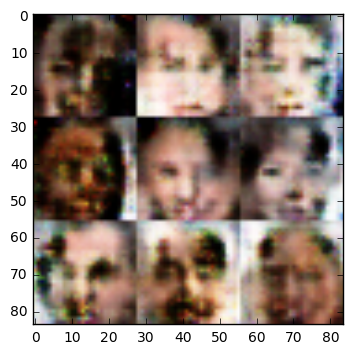

Epoch 1/1... Discriminator Loss: 1.0679 Generator Loss: 1.4102
Epoch 1/1... Discriminator Loss: 1.0730 Generator Loss: 2.1039
Epoch 1/1... Discriminator Loss: 1.0738 Generator Loss: 1.2599
Epoch 1/1... Discriminator Loss: 1.1810 Generator Loss: 1.5299
Epoch 1/1... Discriminator Loss: 1.0430 Generator Loss: 1.0959
Epoch 1/1... Discriminator Loss: 1.1271 Generator Loss: 1.1720
Epoch 1/1... Discriminator Loss: 1.0159 Generator Loss: 1.6288
Epoch 1/1... Discriminator Loss: 1.1929 Generator Loss: 1.0071
Epoch 1/1... Discriminator Loss: 1.4344 Generator Loss: 1.8529
Epoch 1/1... Discriminator Loss: 1.1027 Generator Loss: 0.8865


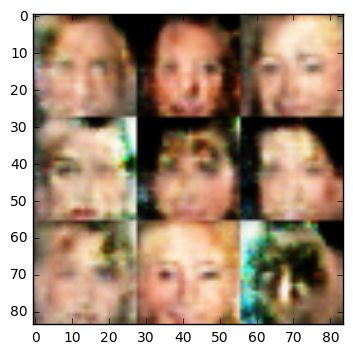

Epoch 1/1... Discriminator Loss: 1.2129 Generator Loss: 1.1459
Epoch 1/1... Discriminator Loss: 1.0817 Generator Loss: 1.2049
Epoch 1/1... Discriminator Loss: 0.9872 Generator Loss: 1.3725
Epoch 1/1... Discriminator Loss: 1.1559 Generator Loss: 1.1609
Epoch 1/1... Discriminator Loss: 1.2795 Generator Loss: 0.8634
Epoch 1/1... Discriminator Loss: 1.0608 Generator Loss: 1.1978
Epoch 1/1... Discriminator Loss: 1.0291 Generator Loss: 1.4883
Epoch 1/1... Discriminator Loss: 1.1585 Generator Loss: 1.1262
Epoch 1/1... Discriminator Loss: 1.1109 Generator Loss: 0.9461
Epoch 1/1... Discriminator Loss: 1.2299 Generator Loss: 0.9343


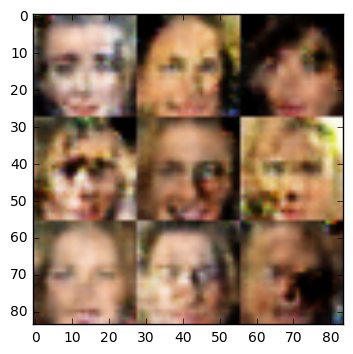

Epoch 1/1... Discriminator Loss: 1.1834 Generator Loss: 1.0417
Epoch 1/1... Discriminator Loss: 1.2053 Generator Loss: 1.0692
Epoch 1/1... Discriminator Loss: 1.2879 Generator Loss: 0.7286
Epoch 1/1... Discriminator Loss: 1.2969 Generator Loss: 0.8626
Epoch 1/1... Discriminator Loss: 1.2448 Generator Loss: 0.9181
Epoch 1/1... Discriminator Loss: 1.1062 Generator Loss: 1.6588
Epoch 1/1... Discriminator Loss: 1.0692 Generator Loss: 1.3859
Epoch 1/1... Discriminator Loss: 1.1985 Generator Loss: 0.9430
Epoch 1/1... Discriminator Loss: 1.1149 Generator Loss: 1.2259
Epoch 1/1... Discriminator Loss: 1.2376 Generator Loss: 0.8210


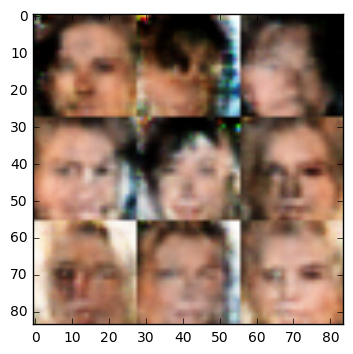

Epoch 1/1... Discriminator Loss: 1.1446 Generator Loss: 1.2347
Epoch 1/1... Discriminator Loss: 1.1991 Generator Loss: 1.0760
Epoch 1/1... Discriminator Loss: 1.1542 Generator Loss: 1.2201
Epoch 1/1... Discriminator Loss: 1.3319 Generator Loss: 0.9528
Epoch 1/1... Discriminator Loss: 1.1476 Generator Loss: 1.0183
Epoch 1/1... Discriminator Loss: 1.2639 Generator Loss: 0.8711
Epoch 1/1... Discriminator Loss: 1.2887 Generator Loss: 0.9398
Epoch 1/1... Discriminator Loss: 1.0956 Generator Loss: 1.3824
Epoch 1/1... Discriminator Loss: 1.1788 Generator Loss: 1.4219
Epoch 1/1... Discriminator Loss: 1.1204 Generator Loss: 1.5386


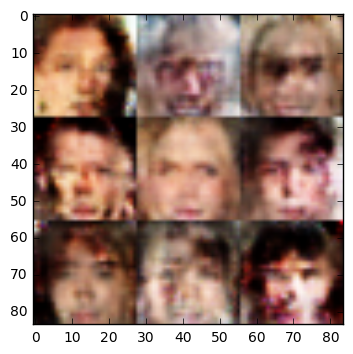

Epoch 1/1... Discriminator Loss: 1.3751 Generator Loss: 1.0765
Epoch 1/1... Discriminator Loss: 1.1887 Generator Loss: 1.3071
Epoch 1/1... Discriminator Loss: 1.3583 Generator Loss: 0.7455
Epoch 1/1... Discriminator Loss: 1.2463 Generator Loss: 0.9937
Epoch 1/1... Discriminator Loss: 1.1876 Generator Loss: 1.0264
Epoch 1/1... Discriminator Loss: 1.2724 Generator Loss: 0.9613
Epoch 1/1... Discriminator Loss: 1.2586 Generator Loss: 0.8869
Epoch 1/1... Discriminator Loss: 1.2768 Generator Loss: 0.9842
Epoch 1/1... Discriminator Loss: 1.2308 Generator Loss: 0.8620
Epoch 1/1... Discriminator Loss: 1.2923 Generator Loss: 0.8285


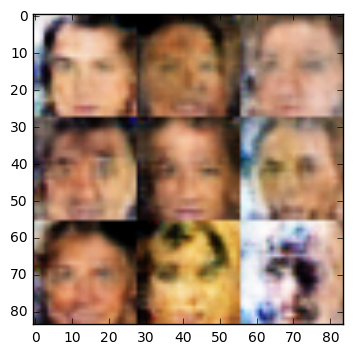

Epoch 1/1... Discriminator Loss: 1.3449 Generator Loss: 0.9036
Epoch 1/1... Discriminator Loss: 1.2894 Generator Loss: 0.8565
Epoch 1/1... Discriminator Loss: 1.2998 Generator Loss: 0.9867
Epoch 1/1... Discriminator Loss: 1.2501 Generator Loss: 1.1596
Epoch 1/1... Discriminator Loss: 1.2455 Generator Loss: 1.0405
Epoch 1/1... Discriminator Loss: 1.2476 Generator Loss: 0.9032
Epoch 1/1... Discriminator Loss: 1.3255 Generator Loss: 0.9787
Epoch 1/1... Discriminator Loss: 1.3913 Generator Loss: 0.8646
Epoch 1/1... Discriminator Loss: 1.1402 Generator Loss: 1.2013
Epoch 1/1... Discriminator Loss: 1.2067 Generator Loss: 0.8830


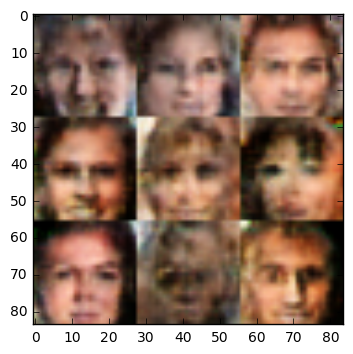

Epoch 1/1... Discriminator Loss: 1.2624 Generator Loss: 1.2592
Epoch 1/1... Discriminator Loss: 1.2992 Generator Loss: 0.8911
Epoch 1/1... Discriminator Loss: 1.1431 Generator Loss: 1.1741
Epoch 1/1... Discriminator Loss: 1.3238 Generator Loss: 0.9821
Epoch 1/1... Discriminator Loss: 1.3333 Generator Loss: 1.0459
Epoch 1/1... Discriminator Loss: 1.5457 Generator Loss: 0.5188
Epoch 1/1... Discriminator Loss: 1.2643 Generator Loss: 0.9674
Epoch 1/1... Discriminator Loss: 1.2868 Generator Loss: 1.1385
Epoch 1/1... Discriminator Loss: 1.1985 Generator Loss: 1.0355
Epoch 1/1... Discriminator Loss: 1.3340 Generator Loss: 0.9468


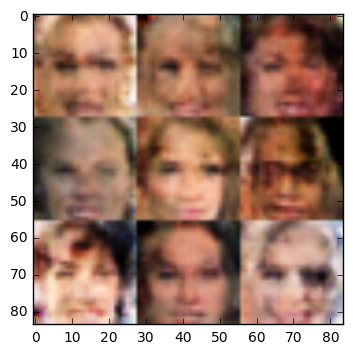

Epoch 1/1... Discriminator Loss: 1.3260 Generator Loss: 0.9451
Epoch 1/1... Discriminator Loss: 1.2338 Generator Loss: 0.9458
Epoch 1/1... Discriminator Loss: 1.2177 Generator Loss: 1.1828
Epoch 1/1... Discriminator Loss: 1.3141 Generator Loss: 0.8152
Epoch 1/1... Discriminator Loss: 1.2541 Generator Loss: 0.9630
Epoch 1/1... Discriminator Loss: 1.2918 Generator Loss: 0.8870
Epoch 1/1... Discriminator Loss: 1.2499 Generator Loss: 1.0961
Epoch 1/1... Discriminator Loss: 1.1988 Generator Loss: 1.0297
Epoch 1/1... Discriminator Loss: 1.2110 Generator Loss: 0.9627
Epoch 1/1... Discriminator Loss: 1.2678 Generator Loss: 1.0545


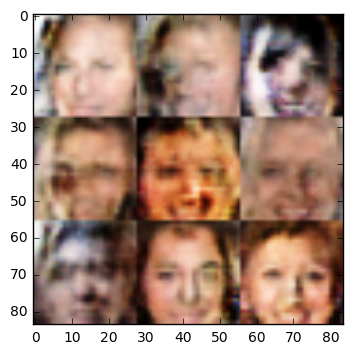

Epoch 1/1... Discriminator Loss: 1.4933 Generator Loss: 0.5390
Epoch 1/1... Discriminator Loss: 1.2068 Generator Loss: 1.0138
Epoch 1/1... Discriminator Loss: 1.3428 Generator Loss: 0.9710
Epoch 1/1... Discriminator Loss: 1.2029 Generator Loss: 1.1369
Epoch 1/1... Discriminator Loss: 1.2610 Generator Loss: 0.8918
Epoch 1/1... Discriminator Loss: 1.3608 Generator Loss: 0.8926
Epoch 1/1... Discriminator Loss: 1.2126 Generator Loss: 1.0474
Epoch 1/1... Discriminator Loss: 1.2722 Generator Loss: 0.9790
Epoch 1/1... Discriminator Loss: 1.3012 Generator Loss: 1.0052
Epoch 1/1... Discriminator Loss: 1.2641 Generator Loss: 0.8444


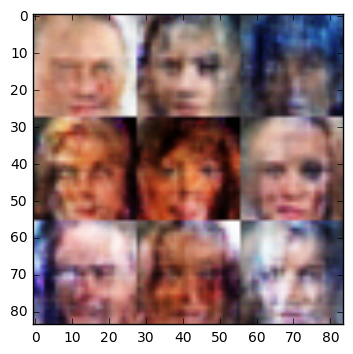

Epoch 1/1... Discriminator Loss: 1.2440 Generator Loss: 1.1135
Epoch 1/1... Discriminator Loss: 1.3719 Generator Loss: 0.9183
Epoch 1/1... Discriminator Loss: 1.1490 Generator Loss: 0.9987
Epoch 1/1... Discriminator Loss: 1.3027 Generator Loss: 1.0579
Epoch 1/1... Discriminator Loss: 1.3272 Generator Loss: 0.8700
Epoch 1/1... Discriminator Loss: 1.3370 Generator Loss: 0.8548
Epoch 1/1... Discriminator Loss: 1.2605 Generator Loss: 0.8779
Epoch 1/1... Discriminator Loss: 1.3147 Generator Loss: 0.8343
Epoch 1/1... Discriminator Loss: 1.2561 Generator Loss: 0.9772
Epoch 1/1... Discriminator Loss: 1.3756 Generator Loss: 0.7403


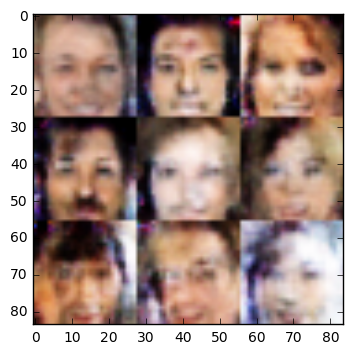

Epoch 1/1... Discriminator Loss: 1.3528 Generator Loss: 0.8369
Epoch 1/1... Discriminator Loss: 1.3024 Generator Loss: 1.0335
Epoch 1/1... Discriminator Loss: 1.2809 Generator Loss: 0.8072
Epoch 1/1... Discriminator Loss: 1.2279 Generator Loss: 1.0189
Epoch 1/1... Discriminator Loss: 1.2638 Generator Loss: 0.9208
Epoch 1/1... Discriminator Loss: 1.3400 Generator Loss: 0.9270
Epoch 1/1... Discriminator Loss: 1.2627 Generator Loss: 1.0260
Epoch 1/1... Discriminator Loss: 1.2953 Generator Loss: 0.8179
Epoch 1/1... Discriminator Loss: 1.3041 Generator Loss: 0.9632
Epoch 1/1... Discriminator Loss: 1.2638 Generator Loss: 1.1106


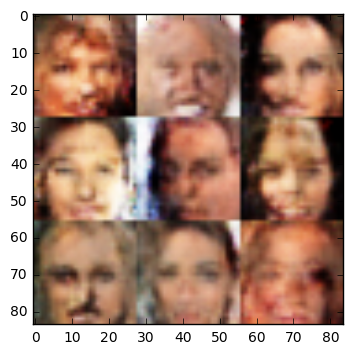

Epoch 1/1... Discriminator Loss: 1.3256 Generator Loss: 0.9556
Epoch 1/1... Discriminator Loss: 1.2347 Generator Loss: 1.0623
Epoch 1/1... Discriminator Loss: 1.2868 Generator Loss: 0.8342
Epoch 1/1... Discriminator Loss: 1.1382 Generator Loss: 1.2312
Epoch 1/1... Discriminator Loss: 1.2976 Generator Loss: 0.8037
Epoch 1/1... Discriminator Loss: 1.2376 Generator Loss: 0.9302
Epoch 1/1... Discriminator Loss: 1.2405 Generator Loss: 0.9556
Epoch 1/1... Discriminator Loss: 1.2934 Generator Loss: 0.8418
Epoch 1/1... Discriminator Loss: 1.2800 Generator Loss: 0.9343
Epoch 1/1... Discriminator Loss: 1.2540 Generator Loss: 0.8839


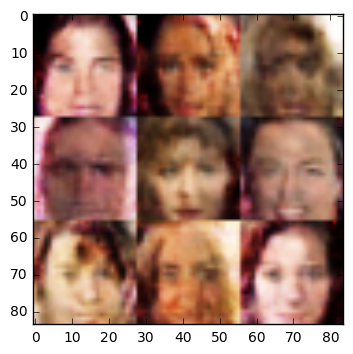

Epoch 1/1... Discriminator Loss: 1.2921 Generator Loss: 0.8925
Epoch 1/1... Discriminator Loss: 1.3132 Generator Loss: 0.9027
Epoch 1/1... Discriminator Loss: 1.3026 Generator Loss: 0.8127
Epoch 1/1... Discriminator Loss: 1.3102 Generator Loss: 1.0591
Epoch 1/1... Discriminator Loss: 1.2530 Generator Loss: 1.0727
Epoch 1/1... Discriminator Loss: 1.4033 Generator Loss: 0.8884
Epoch 1/1... Discriminator Loss: 1.2884 Generator Loss: 1.0231
Epoch 1/1... Discriminator Loss: 1.2841 Generator Loss: 0.7741
Epoch 1/1... Discriminator Loss: 1.2099 Generator Loss: 0.9644
Epoch 1/1... Discriminator Loss: 1.3454 Generator Loss: 0.7790


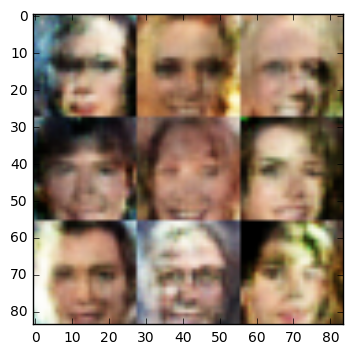

Epoch 1/1... Discriminator Loss: 1.3109 Generator Loss: 0.8633
Epoch 1/1... Discriminator Loss: 1.2919 Generator Loss: 0.9395
Epoch 1/1... Discriminator Loss: 1.1940 Generator Loss: 0.9665
Epoch 1/1... Discriminator Loss: 1.2605 Generator Loss: 0.8983
Epoch 1/1... Discriminator Loss: 1.2402 Generator Loss: 0.9263
Epoch 1/1... Discriminator Loss: 1.2780 Generator Loss: 0.9027
Epoch 1/1... Discriminator Loss: 1.2932 Generator Loss: 0.9368
Epoch 1/1... Discriminator Loss: 1.2219 Generator Loss: 0.9336
Epoch 1/1... Discriminator Loss: 1.2963 Generator Loss: 0.8899
Epoch 1/1... Discriminator Loss: 1.3301 Generator Loss: 0.9009


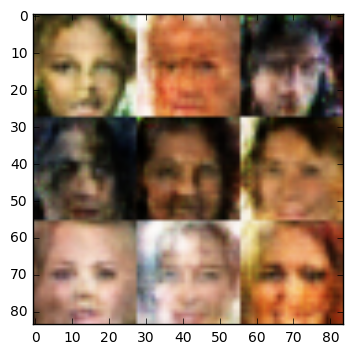

Epoch 1/1... Discriminator Loss: 1.2822 Generator Loss: 0.9166
Epoch 1/1... Discriminator Loss: 1.2300 Generator Loss: 0.9405
Epoch 1/1... Discriminator Loss: 1.3252 Generator Loss: 0.8715
Epoch 1/1... Discriminator Loss: 1.2865 Generator Loss: 0.9843
Epoch 1/1... Discriminator Loss: 1.3628 Generator Loss: 0.7252
Epoch 1/1... Discriminator Loss: 1.2778 Generator Loss: 0.8887
Epoch 1/1... Discriminator Loss: 1.2892 Generator Loss: 0.8445
Epoch 1/1... Discriminator Loss: 1.3396 Generator Loss: 1.0421
Epoch 1/1... Discriminator Loss: 1.2883 Generator Loss: 0.8932
Epoch 1/1... Discriminator Loss: 1.2960 Generator Loss: 0.8259


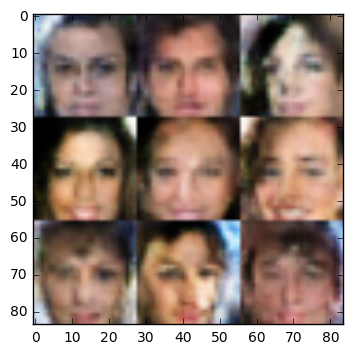

Epoch 1/1... Discriminator Loss: 1.3226 Generator Loss: 0.8793
Epoch 1/1... Discriminator Loss: 1.2951 Generator Loss: 0.8668
Epoch 1/1... Discriminator Loss: 1.2742 Generator Loss: 0.9296
Epoch 1/1... Discriminator Loss: 1.2836 Generator Loss: 0.9636
Epoch 1/1... Discriminator Loss: 1.3422 Generator Loss: 0.7900
Epoch 1/1... Discriminator Loss: 1.3365 Generator Loss: 0.9682
Epoch 1/1... Discriminator Loss: 1.3416 Generator Loss: 0.9497
Epoch 1/1... Discriminator Loss: 1.2624 Generator Loss: 0.9313
Epoch 1/1... Discriminator Loss: 1.3727 Generator Loss: 0.8922
Epoch 1/1... Discriminator Loss: 1.2804 Generator Loss: 0.8675


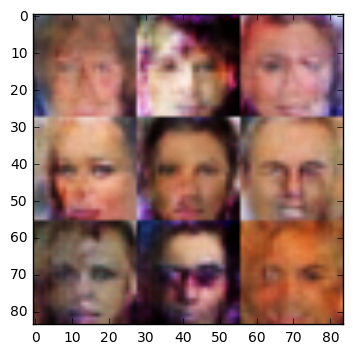

Epoch 1/1... Discriminator Loss: 1.3386 Generator Loss: 0.7764
Epoch 1/1... Discriminator Loss: 1.2886 Generator Loss: 0.9884
Epoch 1/1... Discriminator Loss: 1.3115 Generator Loss: 0.9037
Epoch 1/1... Discriminator Loss: 1.3008 Generator Loss: 1.1111
Epoch 1/1... Discriminator Loss: 1.3319 Generator Loss: 0.9784
Epoch 1/1... Discriminator Loss: 1.3734 Generator Loss: 0.8041
Epoch 1/1... Discriminator Loss: 1.3497 Generator Loss: 0.9620
Epoch 1/1... Discriminator Loss: 1.3367 Generator Loss: 0.7866
Epoch 1/1... Discriminator Loss: 1.2648 Generator Loss: 0.9556
Epoch 1/1... Discriminator Loss: 1.2776 Generator Loss: 0.8782


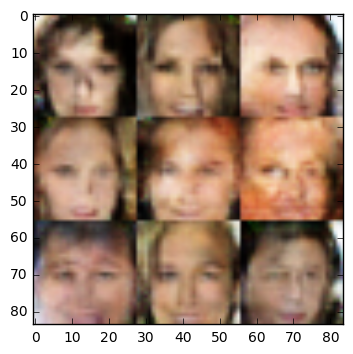

Epoch 1/1... Discriminator Loss: 1.3135 Generator Loss: 0.8569
Epoch 1/1... Discriminator Loss: 1.3374 Generator Loss: 0.9115
Epoch 1/1... Discriminator Loss: 1.3192 Generator Loss: 0.8846
Epoch 1/1... Discriminator Loss: 1.3522 Generator Loss: 0.8322
Epoch 1/1... Discriminator Loss: 1.2589 Generator Loss: 0.8285
Epoch 1/1... Discriminator Loss: 1.3394 Generator Loss: 0.9018
Epoch 1/1... Discriminator Loss: 1.3401 Generator Loss: 0.8523
Epoch 1/1... Discriminator Loss: 1.3382 Generator Loss: 0.8884
Epoch 1/1... Discriminator Loss: 1.3877 Generator Loss: 0.7685
Epoch 1/1... Discriminator Loss: 1.3267 Generator Loss: 0.8243


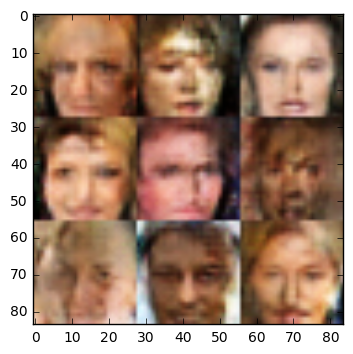

Epoch 1/1... Discriminator Loss: 1.3633 Generator Loss: 0.8338
Epoch 1/1... Discriminator Loss: 1.3461 Generator Loss: 0.9218
Epoch 1/1... Discriminator Loss: 1.3123 Generator Loss: 0.8859
Epoch 1/1... Discriminator Loss: 1.2879 Generator Loss: 0.8856
Epoch 1/1... Discriminator Loss: 1.3573 Generator Loss: 0.8491
Epoch 1/1... Discriminator Loss: 1.2783 Generator Loss: 0.9238
Epoch 1/1... Discriminator Loss: 1.3125 Generator Loss: 0.9457
Epoch 1/1... Discriminator Loss: 1.2671 Generator Loss: 0.9015
Epoch 1/1... Discriminator Loss: 1.2740 Generator Loss: 0.9202
Epoch 1/1... Discriminator Loss: 1.3308 Generator Loss: 0.9216


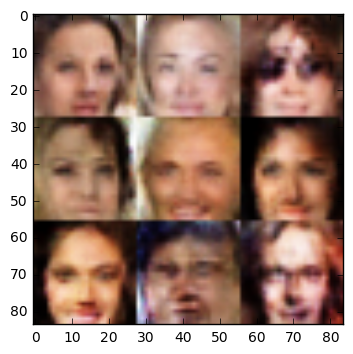

Epoch 1/1... Discriminator Loss: 1.3412 Generator Loss: 0.8797
Epoch 1/1... Discriminator Loss: 1.3697 Generator Loss: 0.7864
Epoch 1/1... Discriminator Loss: 1.3463 Generator Loss: 0.8771
Epoch 1/1... Discriminator Loss: 1.3664 Generator Loss: 0.7326
Epoch 1/1... Discriminator Loss: 1.3286 Generator Loss: 0.8672
Epoch 1/1... Discriminator Loss: 1.3177 Generator Loss: 0.8312
Epoch 1/1... Discriminator Loss: 1.3392 Generator Loss: 0.8966
Epoch 1/1... Discriminator Loss: 1.3968 Generator Loss: 0.7524
Epoch 1/1... Discriminator Loss: 1.3574 Generator Loss: 0.8557
Epoch 1/1... Discriminator Loss: 1.3439 Generator Loss: 0.8643


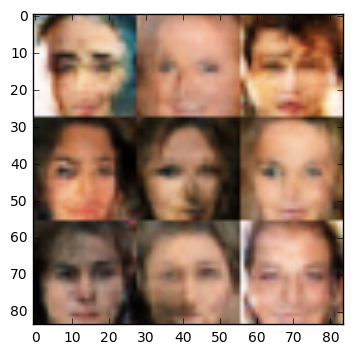

Epoch 1/1... Discriminator Loss: 1.2877 Generator Loss: 0.9529
Epoch 1/1... Discriminator Loss: 1.2237 Generator Loss: 1.0080
Epoch 1/1... Discriminator Loss: 1.3385 Generator Loss: 0.7652
Epoch 1/1... Discriminator Loss: 1.3803 Generator Loss: 0.8881
Epoch 1/1... Discriminator Loss: 1.3091 Generator Loss: 0.8738
Epoch 1/1... Discriminator Loss: 1.3092 Generator Loss: 0.8949
Epoch 1/1... Discriminator Loss: 1.2299 Generator Loss: 0.8413
Epoch 1/1... Discriminator Loss: 1.3580 Generator Loss: 0.8186
Epoch 1/1... Discriminator Loss: 1.2846 Generator Loss: 0.8471
Epoch 1/1... Discriminator Loss: 1.3194 Generator Loss: 0.8802


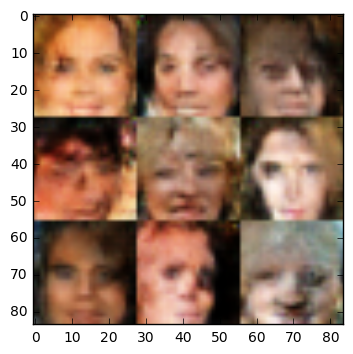

Epoch 1/1... Discriminator Loss: 1.2543 Generator Loss: 0.8955
Epoch 1/1... Discriminator Loss: 1.3087 Generator Loss: 0.8645
Epoch 1/1... Discriminator Loss: 1.3989 Generator Loss: 0.9565
Epoch 1/1... Discriminator Loss: 1.3393 Generator Loss: 0.8316
Epoch 1/1... Discriminator Loss: 1.2820 Generator Loss: 0.9415
Epoch 1/1... Discriminator Loss: 1.2649 Generator Loss: 0.9234
Epoch 1/1... Discriminator Loss: 1.3180 Generator Loss: 0.9392
Epoch 1/1... Discriminator Loss: 1.3656 Generator Loss: 0.8613
Epoch 1/1... Discriminator Loss: 1.3592 Generator Loss: 0.8881
Epoch 1/1... Discriminator Loss: 1.2896 Generator Loss: 0.8689


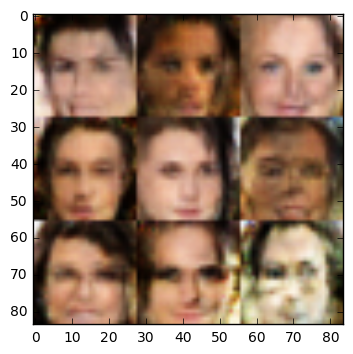

Epoch 1/1... Discriminator Loss: 1.3427 Generator Loss: 0.8446
Epoch 1/1... Discriminator Loss: 1.3434 Generator Loss: 0.8988
Epoch 1/1... Discriminator Loss: 1.3201 Generator Loss: 0.9426
Epoch 1/1... Discriminator Loss: 1.3409 Generator Loss: 0.8298
Epoch 1/1... Discriminator Loss: 1.3629 Generator Loss: 0.8447
Epoch 1/1... Discriminator Loss: 1.3116 Generator Loss: 1.0009
Epoch 1/1... Discriminator Loss: 1.2883 Generator Loss: 0.8477
Epoch 1/1... Discriminator Loss: 1.3028 Generator Loss: 0.8916
Epoch 1/1... Discriminator Loss: 1.2651 Generator Loss: 1.0560
Epoch 1/1... Discriminator Loss: 1.2750 Generator Loss: 1.0213


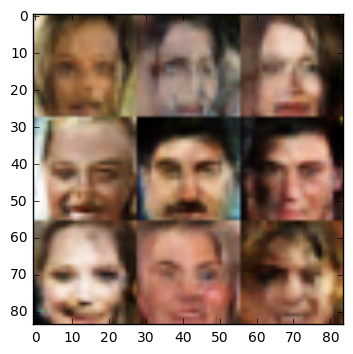

Epoch 1/1... Discriminator Loss: 1.3227 Generator Loss: 0.9148
Epoch 1/1... Discriminator Loss: 1.2819 Generator Loss: 0.8872
Epoch 1/1... Discriminator Loss: 1.3685 Generator Loss: 0.8023
Epoch 1/1... Discriminator Loss: 1.2517 Generator Loss: 0.9153
Epoch 1/1... Discriminator Loss: 1.2991 Generator Loss: 0.8260
Epoch 1/1... Discriminator Loss: 1.4059 Generator Loss: 0.7980
Epoch 1/1... Discriminator Loss: 1.3289 Generator Loss: 0.8436
Epoch 1/1... Discriminator Loss: 1.2618 Generator Loss: 0.9795
Epoch 1/1... Discriminator Loss: 1.3025 Generator Loss: 0.8789
Epoch 1/1... Discriminator Loss: 1.2796 Generator Loss: 0.8293


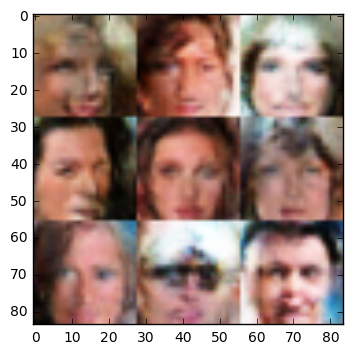

Epoch 1/1... Discriminator Loss: 1.3177 Generator Loss: 0.9337
Epoch 1/1... Discriminator Loss: 1.3551 Generator Loss: 0.8114
Epoch 1/1... Discriminator Loss: 1.2783 Generator Loss: 0.9073
Epoch 1/1... Discriminator Loss: 1.2497 Generator Loss: 0.8749
Epoch 1/1... Discriminator Loss: 1.2890 Generator Loss: 0.8188
Epoch 1/1... Discriminator Loss: 1.3050 Generator Loss: 0.8772
Epoch 1/1... Discriminator Loss: 1.2716 Generator Loss: 0.8670
Epoch 1/1... Discriminator Loss: 1.4316 Generator Loss: 0.7603
Epoch 1/1... Discriminator Loss: 1.3196 Generator Loss: 0.9435
Epoch 1/1... Discriminator Loss: 1.2333 Generator Loss: 0.8971


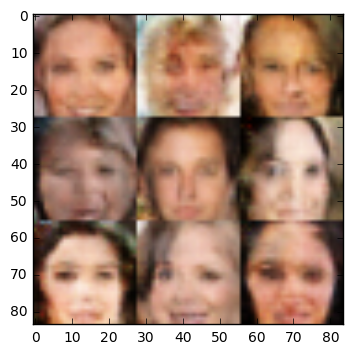

Epoch 1/1... Discriminator Loss: 1.3272 Generator Loss: 0.9271
Epoch 1/1... Discriminator Loss: 1.2913 Generator Loss: 0.9157
Epoch 1/1... Discriminator Loss: 1.3060 Generator Loss: 0.9494
Epoch 1/1... Discriminator Loss: 1.3105 Generator Loss: 0.8265
Epoch 1/1... Discriminator Loss: 1.3509 Generator Loss: 0.7560
Epoch 1/1... Discriminator Loss: 1.2790 Generator Loss: 0.8303


In [27]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交此项目
提交此项目时，请确保在保存笔记本计算机之前运行所有单元格。 将笔记本文件保存为“dlnd_face_generation.ipynb”，并将其另存为“File” - >“Download as”下的HTML文件。 在您的提交中包含“helper.py”和“problem_unittests.py”文件。